<a href="https://colab.research.google.com/github/minsloth/Project_minsloth/blob/main/Ai_12_%EC%95%88%EB%AF%BC%EC%98%81_Section2_before.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
# 설치후 런타임 다시하고 실행
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

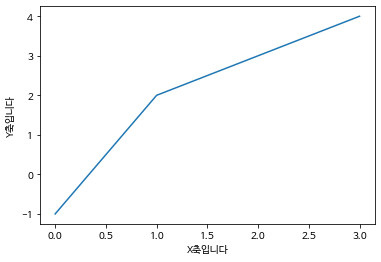

In [3]:
# 한글 잘 나오는지 테스트
plt.plot([-1, 2, 3, 4])
plt.xlabel('X축입니다')
plt.ylabel('Y축입니다')
plt.show()

In [4]:
# Google Colab을 사용하는 경우 해당 셀을 실행하세요
import sys

if "google.colab" in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

     |████████████████████████████████| 86 kB 1.9 MB/s 
     |████████████████████████████████| 106 kB 5.7 MB/s 
     |████████████████████████████████| 245 kB 5.4 MB/s 
     |████████████████████████████████| 4.7 MB 26.0 MB/s 
     |████████████████████████████████| 102 kB 48.2 MB/s 
     |████████████████████████████████| 690 kB 8.6 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 34.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d5952f6317a1708ba284f078639ded7ef6ca81a1b33438830beab7e78add6b50
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=baf3262cb4f12f624e99f4de265912006d1b99c76859704c7871a619f712e099
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e2975

     |████████████████████████████████| 564 kB 5.3 MB/s 


# **E-Commerce Shipping Data**
전자상거래 배송 데이터 분석 프로젝트

- ID: 고객의 ID 번호입니다.
- Warehouse block: 회사는 A,B,C,D,E와 같은 블록으로 구분된 큰 창고를 가지고 있습니다.
- Mode of shipment: 회사는 선박, 항공, 육로 등 다양한 방법으로 제품을 배송합니다.
- Customer care calls: 배송조회 문의에서 걸려온 전화수입니다.
- Customer rating: 회사는 모든 고객으로부터 평가했습니다. 1이 가장 낮음(최악), 5가 가장 높음(최상)입니다.
- Cost of the product:제품 비용(미국 달러).
- Prior purchases: 이전 구매 수.
- Product importance: 회사는 제품을 낮음, 중간, 높음과 같은 다양한 매개변수로 분류했습니다.
- Gender: 남성과 여성.
- Discount offered: 특정 제품에 대해 제공되는 할인.
- Weight in gms: 무게(g)입니다.
- Reached on time: 목표 변수로, 1은 제품이 정시에 도달하지 않았음을 나타내고 0은 정시에 도달했음을 나타냅니다.


**Reached on time : target 변수**

## **데이터 선정이유**

평소 오프라인 구매보다는 온라인 구매를 선호하는 편인데 할인율과 고객의 주문정도 및 가격에 따른 고객 구매 비율 등이 궁금하여 선정하게 되었습니다. 컬럼도 적당하고 데이터 개수도 적당하다 생각하여 여러 가설을 세워 분석해볼 것 입니다.

이 제품 배송 추적 데이터는 귀하의 질문에 즉시 답변합니다.

- 고객 평가는 무엇이었습니까? 
- 그리고 제품이 제 시간에 배송되었습니까?
- 고객 문의에 답변이 되고 있습니까?
- 제품 중요도가 높은 경우. 가장 높은 평가를 받거나 정시에 배달되고 있습니까?


* 데이터 주소 : https://www.kaggle.com/prachi13/customer-analytics


In [5]:
# 일괄설정 눌러서 원하는 데이터만 확보, 행/열 전환으로 필요한 데이터셋 확보
# 드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

import io
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'


plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

Mounted at /content/drive


In [6]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/My Drive/Ai_camp/data/E-Commerce Shipping Data.csv'
filename

#pandas read_csv로 불러오기
data = pd.read_csv(filename)
data

# pd.read_csv('~~.csv', unicode = 'cp949')도 가능 => 한글 불러오기


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [7]:
# 원본 데이터 복제
df = data.copy()
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
# 데이터 속성 확인, 데이터 타입도 같이 볼 수 있다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [10]:
# 데이터 타입 확인
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [11]:
# 여러 분위수를 한번에 볼 수 있게 해준다
df.describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
5%,550.90000,2.000000,1.000000,135.000000,2.000000,1.000000,1163.000000,0.000000
10%,1100.80000,3.000000,1.000000,144.000000,2.000000,2.000000,1327.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
90%,9899.20000,6.000000,5.000000,269.200000,5.000000,44.000000,5632.000000,1.000000


In [12]:
# 결측치 확인
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

결측치가 존재하지 않으므로 EDA가 비교적 수월하다

# **회귀분석 진행**

**통계정보를 활용**

SalePrice의 통계 정보를 확인해 보겠습니다.


In [13]:
df['Cost_of_the_Product']

0        177
1        216
2        183
3        176
4        184
        ... 
10994    252
10995    232
10996    242
10997    223
10998    155
Name: Cost_of_the_Product, Length: 10999, dtype: int64

In [14]:
# Cost_of_the_Product의 최소, 최대, 평균, 중앙값 계산
df['Cost_of_the_Product'].min(), df['Cost_of_the_Product'].max(), df['Cost_of_the_Product'].mean(), df['Cost_of_the_Product'].median()

(96, 310, 210.19683607600692, 214.0)

In [15]:
## Cost_of_the_Product 통계 정보를 요약해서 확인할 수도 있습니다.
df['Cost_of_the_Product'].describe()

count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: Cost_of_the_Product, dtype: float64

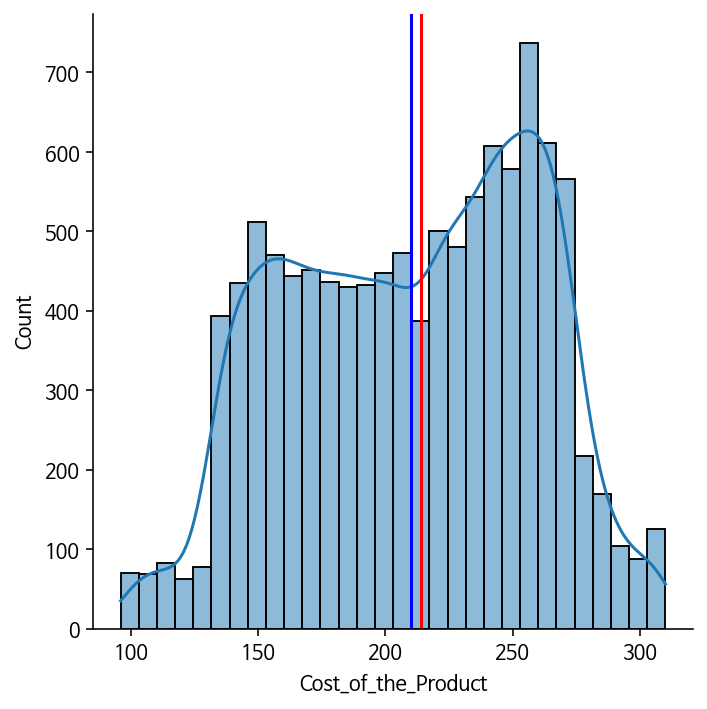

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

## Cost_of_the_Product의 확률밀도함수를 그려보겠습니다
sns.displot(df['Cost_of_the_Product'], kde=True)

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(df['Cost_of_the_Product'].mean(), color='blue')
plt.axvline(df['Cost_of_the_Product'].median(), color='red');

결론 : 제품가격이 평균으로 밀집되어 있으므로 다른 컬럼들과 회귀분석을 진행하기에는 좋은 데이터가 아니다.

### **상관관계** 
제품 비용이 전체공간크기(LotArea)와 같은 다른 특성과 어떤 상관관계(dependent)가 있을까요? 이 관계를 시각적으로 살펴보겠습니다.

In [17]:
# Weight_in_gms, Prior_purchases, Discount_offered

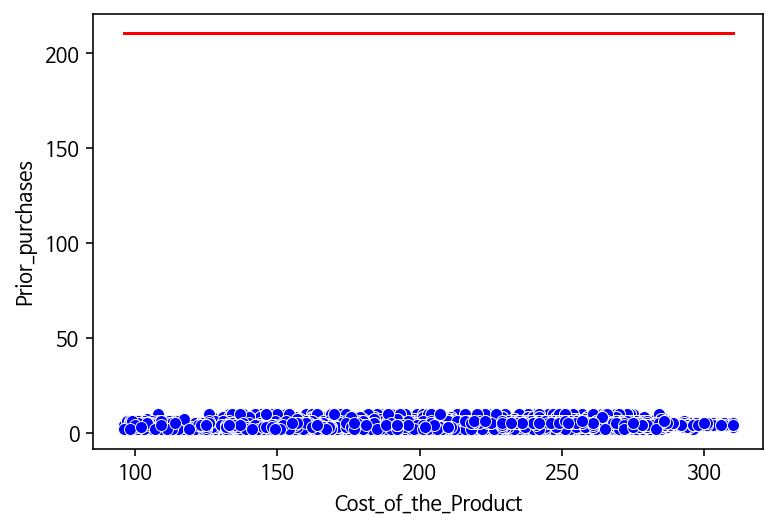

In [18]:
# 기준모델을 그려보겠습니다.

x = df['Cost_of_the_Product']
y = df['Prior_purchases']

predict = df['Cost_of_the_Product'].mean()
errors = predict - df['Cost_of_the_Product']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

### **결론**
제품 가격이 평균적으로 차이가 안나서 제품 가격과 다른 컬럼 들은 상관관계가 없는 것을 볼 수 있다

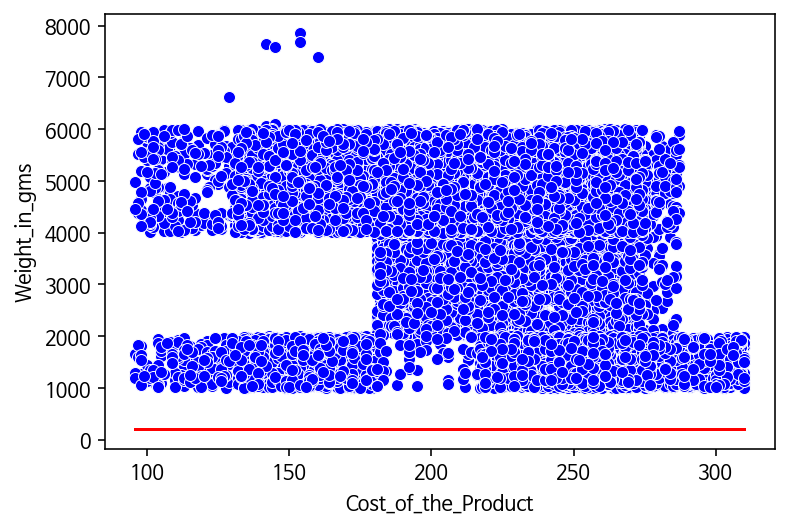

In [19]:
# 기준모델을 그려보겠습니다.

x = df['Cost_of_the_Product']
y = df['Weight_in_gms']

predict = df['Cost_of_the_Product'].mean()
errors = predict - df['Cost_of_the_Product']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

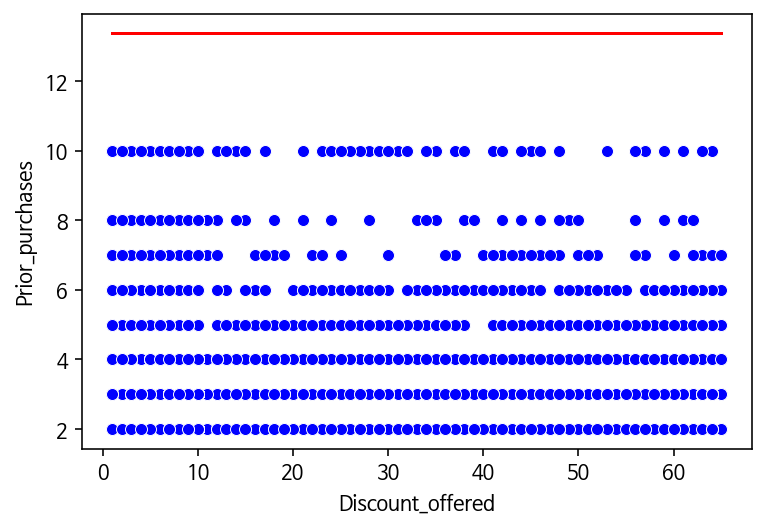

In [20]:
# 기준모델을 그려보겠습니다.
x = df['Discount_offered']
y = df['Prior_purchases']

predict = df['Discount_offered'].mean()
errors = predict - df['Discount_offered']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

## **상관관계가 없으므로 회귀분석 힘들다고 판단**
: 분류분석 이용하여 프로젝트 진행

In [21]:
# 변수 이름 바꾸기
df.rename(columns = {'Reached.on.Time_Y.N': 'Reached_on_Time'}, inplace = True)

In [22]:
df['Reached_on_Time']

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached_on_Time, Length: 10999, dtype: int64

In [23]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [26]:
# ID열 필요 없으므로 삭제
# df.drop(['ID'],axis=1, inplace = True)

In [217]:
# 인덱스 열 다시 설정 => id열을 사용하고 drop = 'True'이용해서 그 열을 지운다
# df.set_index('ID',drop=True)

# **결정트리(Decision Trees)**

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [25]:
# 데이터를 간단히 살펴보겠습니다.
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Warehouse_block,D,F,A,B,C
Mode_of_Shipment,Flight,Flight,Flight,Flight,Flight
Customer_care_calls,4,4,2,3,2
Customer_rating,2,5,2,3,2
Cost_of_the_Product,177,216,183,176,184
Prior_purchases,3,2,4,4,3
Product_importance,low,low,low,medium,medium
Gender,F,M,M,M,F
Discount_offered,44,59,48,10,46


## **상관분석(히트맵)**

In [26]:
df.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached_on_Time,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [27]:
# 각 컬럼관에 상관관계 파악 => 전반적으로 낮은 수치로 상관관계가 없음을 알 수 있다
df.corr()['Reached_on_Time'].sort_values()

ID                    -0.411822
Weight_in_gms         -0.268793
Cost_of_the_Product   -0.073587
Customer_care_calls   -0.067126
Prior_purchases       -0.055515
Customer_rating        0.013119
Discount_offered       0.397108
Reached_on_Time        1.000000
Name: Reached_on_Time, dtype: float64

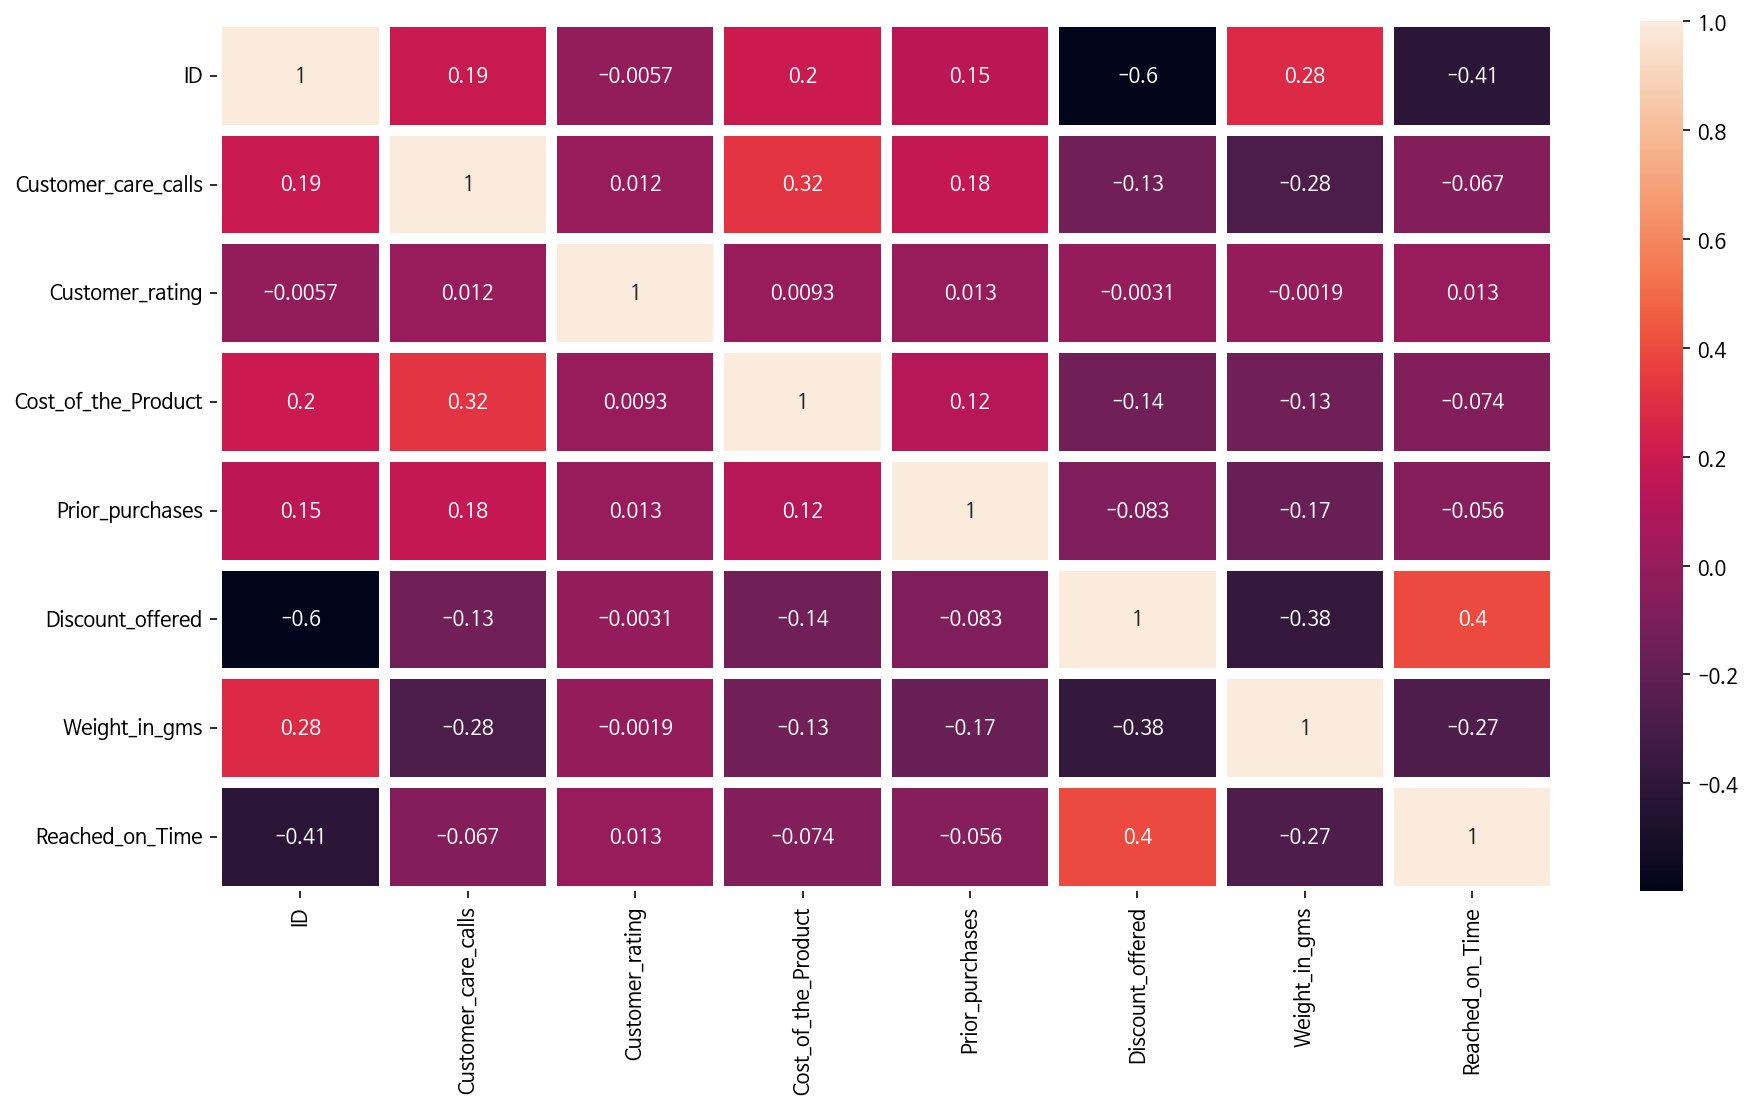

In [28]:
# 히트맵을 통해 살펴보기
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, linewidth=5, linecolor='white')

1. 해당 특성을 target으로 지정한 이유를 설명하세요
- 제품 배송시간에 맞게 택배가 올바르가 배송되었는지 알기 위해서 고객 ID와 Reached_On_Time 변수를 타겟으로 잡았습니다.

2. 해당 베이스라인 모델과 평가지표를 선택한 이유를 설명하세요
- 히트맵을 돌렸더니 서로 상관관계가 낮아 회귀분석에 적합한 데이터가 아니라고 생각했습니다. 변수간 그래프를 그려도 서로 상관 관계가 전혀 없으므로 분류분석이 적합합니다.

## **베이스라인 정확도**

분류를 위한 베이스라인 정확도를 계산하는 calculate_baseline_score 함수를 작성하세요.

예측해야 하는 target은 Reached_on_Time 입니다.
전체 데이터를 써서 baseline accuracy score를 계산하세요.
최빈 클래스를 사용하는 baseline을 가정하세요.

In [29]:
def calculate_baseline_score(df):
    accuracy_score = 0
    
    # YOUR CODE HERE
    from sklearn.metrics import accuracy_score

    target = 'Reached_on_Time'
    base_predict =[df[target].mode()[0]]*len(df) #기본모델 예측값
    accuracy_score = accuracy_score(df[[target]], base_predict)
    
    # YOUR CODE ENDS HERE
    '''
    target = 'shot_made_flag'
    scores = df[target].value_counts(normalize = True)
    accuracy_score = max(scores)
    '''
    
    return accuracy_score


In [30]:
baseline_accuracy_score = calculate_baseline_score(df)
print('baseline accuracy score:', baseline_accuracy_score)

baseline accuracy score: 0.5966906082371125


In [31]:
target = 'Reached_on_Time'

In [32]:
features = df.columns.drop(['Reached_on_Time'])

In [33]:
df[features]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233
1,2,F,Flight,4,5,216,2,low,M,59,3088
2,3,A,Flight,2,2,183,4,low,M,48,3374
3,4,B,Flight,3,3,176,4,medium,M,10,1177
4,5,C,Flight,2,2,184,3,medium,F,46,2484
...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247
10996,10997,C,Ship,5,4,242,5,low,F,4,1155
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210


In [241]:
# df.set_index('ID', inplace = True)
# df.reset_index()

In [242]:
# df.style.hide_index

In [144]:
# df.drop(['ID'],axis=1,inplace=True)

In [36]:
df.style.hide_index

<bound method Styler.hide_index of <pandas.io.formats.style.Styler object at 0x7f4fbcf89cd0>>

# **전자상거래 배송 데이터**

제품 배송 시간에 맞춰 배송되었는지 예측모델 만들기
학습용 데이터 (X_train, y_train)을 이용하여 배송 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 ROC-AUC 평가지표에 따라 채점)

In [34]:
# [시험용 데이터셋 만들기]
# 고객 ID를 바탕으로 배송이 잘 도착했는지 확인하는 모델
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 
    
X_train, X_test, y_train, y_test = exam_data_load(df, 
                                                  target='Reached_on_Time', 
                                                  id_name='ID')

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8799, 10), (2200, 10), (8799, 2), (2200, 2))

In [39]:
''''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
y_train = X_train[target]
X_train = X_train.drop(columns=[target])
y_test = X_test[target]
X_test = X_test.drop(columns=[target])
   
X_train, X_test, y_train, y_test = exam_data_load(df, 
                                                  target='Reached_on_Time', 
                                                  )

X_train.shape, X_test.shape, y_train.shape, y_test.shape
'''

"'\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)\ny_train = X_train[target]\nX_train = X_train.drop(columns=[target])\ny_test = X_test[target]\nX_test = X_test.drop(columns=[target])\n   \nX_train, X_test, y_train, y_test = exam_data_load(df, \n                                                  target='Reached_on_Time', \n                                                  )\n\nX_train.shape, X_test.shape, y_train.shape, y_test.shape\n"

### **EDA**

In [35]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=2)
X_train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
3999,B,Ship,3,4,134,3,high,F,6,5680
9559,F,Ship,4,3,173,3,medium,M,5,5331
2649,B,Ship,2,1,192,3,high,M,46,3206
4843,F,Ship,6,5,284,4,medium,M,8,5346
9601,F,Flight,3,1,246,3,low,F,10,4707
...,...,...,...,...,...,...,...,...,...,...
3934,C,Ship,6,5,178,3,low,F,5,4096
2669,F,Ship,3,1,206,2,medium,F,56,2069
1152,D,Ship,4,1,135,10,medium,M,35,1989
6201,B,Ship,4,4,251,2,medium,F,6,4376


In [36]:
y_train

,ID,Reached_on_Time
3999,4000,0
9559,9560,1
2649,2650,1
4843,4844,1
9601,9602,1
...,...,...
3934,3935,0
2669,2670,1
1152,1153,1
6201,6202,0


In [37]:
df[target].value_counts(normalize=True)

1    0.596691
0    0.403309
Name: Reached_on_Time, dtype: float64

In [38]:
print(f'Percentage of successful shots is {df[target].mean()*100:.0f}%')

Percentage of successful shots is 60%


In [39]:
# X_test 결측치 확인
X_test.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [40]:
# y_test 결측치 확인
y_test.isnull().sum()

ID                 0
Reached_on_Time    0
dtype: int64

In [42]:
# 데이터 타입 확인
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 3999 to 9332
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      8799 non-null   object
 1   Mode_of_Shipment     8799 non-null   object
 2   Customer_care_calls  8799 non-null   int64 
 3   Customer_rating      8799 non-null   int64 
 4   Cost_of_the_Product  8799 non-null   int64 
 5   Prior_purchases      8799 non-null   int64 
 6   Product_importance   8799 non-null   object
 7   Gender               8799 non-null   object
 8   Discount_offered     8799 non-null   int64 
 9   Weight_in_gms        8799 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 756.2+ KB


### **범주형 변수**
- Warehouse_block
- Mode_of_Shipment
- Product_importance
- Gender

In [43]:
# object 타입 컬럼, 고유값 개수 확인
X_train[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']].nunique()

Warehouse_block       5
Mode_of_Shipment      3
Product_importance    3
Gender                2
dtype: int64

범주형 변수는 원 핫 인코딩 수행하거나 삭제 해야 한다

### **원-핫 인코딩**

In [44]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np


In [45]:
df['Warehouse_block']

0        D
1        F
2        A
3        B
4        C
        ..
10994    A
10995    B
10996    C
10997    F
10998    D
Name: Warehouse_block, Length: 10999, dtype: object

In [46]:
df['Mode_of_Shipment']

0        Flight
1        Flight
2        Flight
3        Flight
4        Flight
          ...  
10994      Ship
10995      Ship
10996      Ship
10997      Ship
10998      Ship
Name: Mode_of_Shipment, Length: 10999, dtype: object

In [51]:
df['Product_importance']

0           low
1           low
2           low
3        medium
4        medium
          ...  
10994    medium
10995    medium
10996       low
10997    medium
10998       low
Name: Product_importance, Length: 10999, dtype: object

In [256]:
df['Gender']

0        F
1        M
2        M
3        M
4        F
        ..
10994    F
10995    F
10996    F
10997    M
10998    F
Name: Gender, Length: 10999, dtype: object

### **[레이블 인코딩] Permalink**
레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환하는 것이다. sklearn.preprocessing 에서 LabelEncoder 클래스를 사용한다.


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Warehouse_block' ,'Mode_of_Shipment','Product_importance','Gender']
for col in cols:
  X_train[col] = le.fit_transform(X_train[col])
  X_test[col] = le.fit_transform(X_test[col])

    

In [48]:
print(X_train.info(), X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 3999 to 9332
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      8799 non-null   int64
 1   Mode_of_Shipment     8799 non-null   int64
 2   Customer_care_calls  8799 non-null   int64
 3   Customer_rating      8799 non-null   int64
 4   Cost_of_the_Product  8799 non-null   int64
 5   Prior_purchases      8799 non-null   int64
 6   Product_importance   8799 non-null   int64
 7   Gender               8799 non-null   int64
 8   Discount_offered     8799 non-null   int64
 9   Weight_in_gms        8799 non-null   int64
dtypes: int64(10)
memory usage: 756.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 4732 to 4413
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      2200 non-null   int64
 1   Mode_of_Shipme

In [49]:
X_train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
3999,1,2,3,4,134,3,0,0,6,5680
9559,4,2,4,3,173,3,2,1,5,5331
2649,1,2,2,1,192,3,0,1,46,3206
4843,4,2,6,5,284,4,2,1,8,5346
9601,4,0,3,1,246,3,1,0,10,4707
...,...,...,...,...,...,...,...,...,...,...
3934,2,2,6,5,178,3,1,0,5,4096
2669,4,2,3,1,206,2,2,0,56,2069
1152,3,2,4,1,135,10,2,1,35,1989
6201,1,2,4,4,251,2,2,0,6,4376


In [50]:
y_train

,ID,Reached_on_Time
3999,4000,0
9559,9560,1
2649,2650,1
4843,4844,1
9601,9602,1
...,...,...
3934,3935,0
2669,2670,1
1152,1153,1
6201,6202,0


In [142]:
'''
from sklearn.preprocessing import LabelEncoder

items = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

items = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

#LabelEncoder로 2차원 데이터로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels = labels.reshape(-1, 1)
'''

인코딩 변환값: [3 1 2 0]


In [51]:
# 몯류
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, KFold  # 데이터 분할, KFold
from sklearn.linear_model import LogisticRegression          # 1. 로지스틱 회귀 => 정규화 필수(StandardScaler)
from sklearn.tree import DecisionTreeClassifier              # 2. 의사결정나무 - 분류
from sklearn.ensemble import RandomForestClassifier          # 3. 랜덤포레스트 - 분류
import xgboost as xgb                                        # 4. Xgboost
from sklearn.svm import SVC                                  # 5. 서포트 벡터 머신
from sklearn.neighbors import KNeighborsClassifier           # 6. K-최근접 이웃 분류
from sklearn.metrics import roc_curve, roc_auc_score, auc    # roc_auc_score
from datetime import datetime                


from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score, auc
from datetime import datetime

In [52]:
# 학습용 데이터(X_train, Y_train)를 학습&검증용으로 분할 (8:2)
from sklearn.model_selection import train_test_split
X_train_en, X_val,y_train_en, y_val = train_test_split(X_train, y_train['Reached_on_Time'],
                                                       test_size=0.2, random_state=2021)

In [53]:
print(X_train.shape, y_train.shape)
print(X_train_en.shape, X_val.shape, y_train_en.shape, y_val.shape)

(8799, 10) (8799, 2)
(7039, 10) (1760, 10) (7039,) (1760,)


###  **모델 성능 검증**

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
# 1. LogisticRegression                               =>63.69
# 범주형 데이터 컬럼을 LableEncoder 처리하면 에러남
# 범주형 데이터 컬럼을 삭제하면 괜츈!.. (왜 일까..❓❔)

### 모델정의
model_L = LogisticRegression()

### 학습
model_L.fit(X_train_en, y_train_en)
### 검증
round(model_L.score(X_val, y_val) * 100, 2)

63.69

In [56]:
# 2. KNeighborsClassifier                             => 66.31
### 모델정의
model_k = KNeighborsClassifier()
### 학습
model_k.fit(X_train_en, y_train_en)
### 검증
round(model_k.score(X_val, y_val)*100,2)

66.31

In [57]:
# 3. SVC                                               => 65.4
### 모델정의
model_s = SVC()

### 학습
model_s.fit(X_train_en, y_train_en)

### 검증
round(model_s.score(X_val, y_val)*100, 2)

65.4

In [58]:
# 5. RandomForestClassifier                              => 65.51
### 모델정의
model_r = RandomForestClassifier()
### 학습
model_r.fit(X_train_en, y_train_en)
### 검증
round(model_r.score(X_val, y_val)*100, 2)

65.28

In [60]:
# 6. XGBClassifier                                        => 67.56
### 모델정의
model_x = XGBClassifier()
### 학습
model_x.fit(X_train_en, y_train_en)
### 검증
round(model_x.score(X_val, y_val)*100, 2)


# XGBClassifier  모델 성능이 가장 좋다

67.56

In [61]:
# train test split
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, 
                                                  test_size=0.2, shuffle=True, random_state=42)

### XGB 분류 모델 설명
https://blog.naver.com/PostView.nhn?blogId=gustn3964&logNo=221431714122

In [78]:
# 모델정의
model = XGBClassifier()

# 학습
model.fit(X_train, y_train['Reached_on_Time'])

# 예측
pred = model.predict(X_test)

print(pred)

[0 1 0 ... 0 0 0]


In [79]:
submission = pd.DataFrame({
        "ID": y_test["ID"],
        "Reached_on_Time": pred
    })

In [80]:
submission

,ID,Reached_on_Time
4732,4733,0
2039,2040,1
5113,5114,0
2360,2361,1
5995,5996,0
...,...,...
359,360,1
7831,7832,1
9753,9754,0
3750,3751,0


In [82]:
# 조금 떨어진 성능을 보여주고 있음
round(model.score(X_test, y_test['Reached_on_Time']) * 100, 2)

66.64

In [83]:
print(roc_auc_score(submission.iloc[:,1], y_test.iloc[:,1]))

0.7288230941162257


In [84]:
# 모델정의
final_model = XGBClassifier(booster='gbtree', 
                    # colsample_bylevel=0.9, 
                    # colsample_bytree=0.8, 
                    # gamma=0, 
                    max_depth=8, 
                    min_child_weight=3, 
                    n_estimators=50, 
                    nthread=4, 
                    objective='binary:logistic', 
                    random_state=20, 
                    silent= True)



# 학습
final_model.fit(X_train, y_train['Reached_on_Time'])

# 예측
pred = final_model.predict(X_test)

print(pred)

[0 1 0 ... 0 1 1]


In [74]:
y_test

,ID,Reached_on_Time
4732,4733,1
2039,2040,1
5113,5114,0
2360,2361,1
5995,5996,0
...,...,...
359,360,1
7831,7832,1
9753,9754,1
3750,3751,0


In [75]:
round(final_model.score(X_test, y_test['Reached_on_Time'])*100, 2)

65.73

In [76]:
print(roc_auc_score(submission.iloc[:,1], y_test.iloc[:,1]))

0.7288230941162257
